In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import WOEEncoder
import category_encoders as ce

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.utils import resample
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')


1. EDA

In [105]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [107]:
df.shape

(100000, 9)

In [108]:
is_diabetic = df["diabetes"].value_counts()
print("Yes: ",is_diabetic[1])
print("No: ",is_diabetic[0])

Yes:  8500
No:  91500


The data set is unbalanced

In [109]:
# Check for duplicates and missing values
print("Missing Values")
print(df.isna().sum())
print("Duplicates:" ,df.duplicated().sum())

Missing Values
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
Duplicates: 3854


In [112]:
round(df.describe(include="all"), 3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000,100000.000,100000.000,100000,100000.000,100000.000,100000.000,100000.000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.886,0.075,0.039,NaN,27.321,5.528,138.058,0.085
std,NaN,22.517,0.263,0.195,NaN,6.637,1.071,40.708,0.279
min,NaN,0.080,0.000,0.000,NaN,10.010,3.500,80.000,0.000
25%,NaN,24.000,0.000,0.000,NaN,23.630,4.800,100.000,0.000
50%,NaN,43.000,0.000,0.000,NaN,27.320,5.800,140.000,0.000
75%,NaN,60.000,0.000,0.000,NaN,29.580,6.200,159.000,0.000


2. Data Visualization

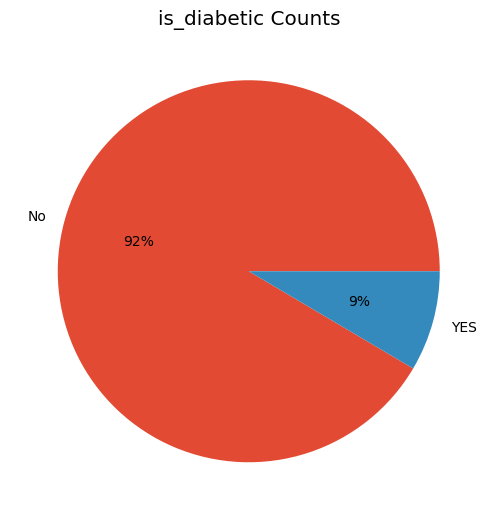

In [8]:
is_diabetic = df["diabetes"].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(is_diabetic, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_diabetic Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


Gender Distribution

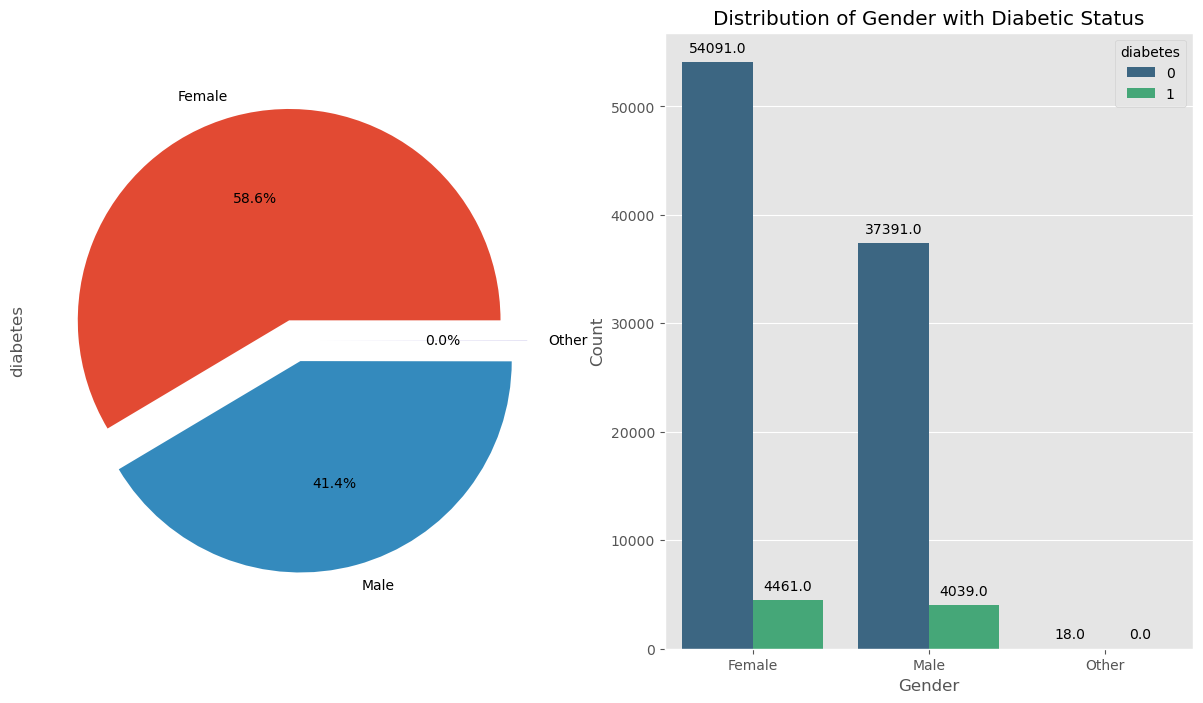

In [9]:
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

#Gender Distribution
explode = [0.1, 0.1, 0.1]
df.groupby('gender')['diabetes'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);

ax = sns.countplot(x="gender", hue="diabetes", data=df,ax=axb[1], palette="viridis")

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Distribution of Gender with Diabetic Status")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

Age Distribution

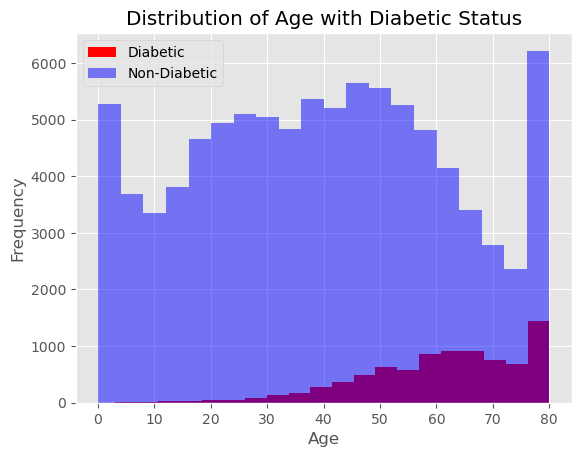

In [10]:
#Age Distribution
plt.hist(df[df['diabetes'] == 1]['age'], bins=20, alpha=1, label='Diabetic', color='red')
plt.hist(df[df['diabetes'] == 0]['age'], bins=20, alpha=0.5, label='Non-Diabetic', color='blue')

plt.title('Distribution of Age with Diabetic Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Hypertension Distribution

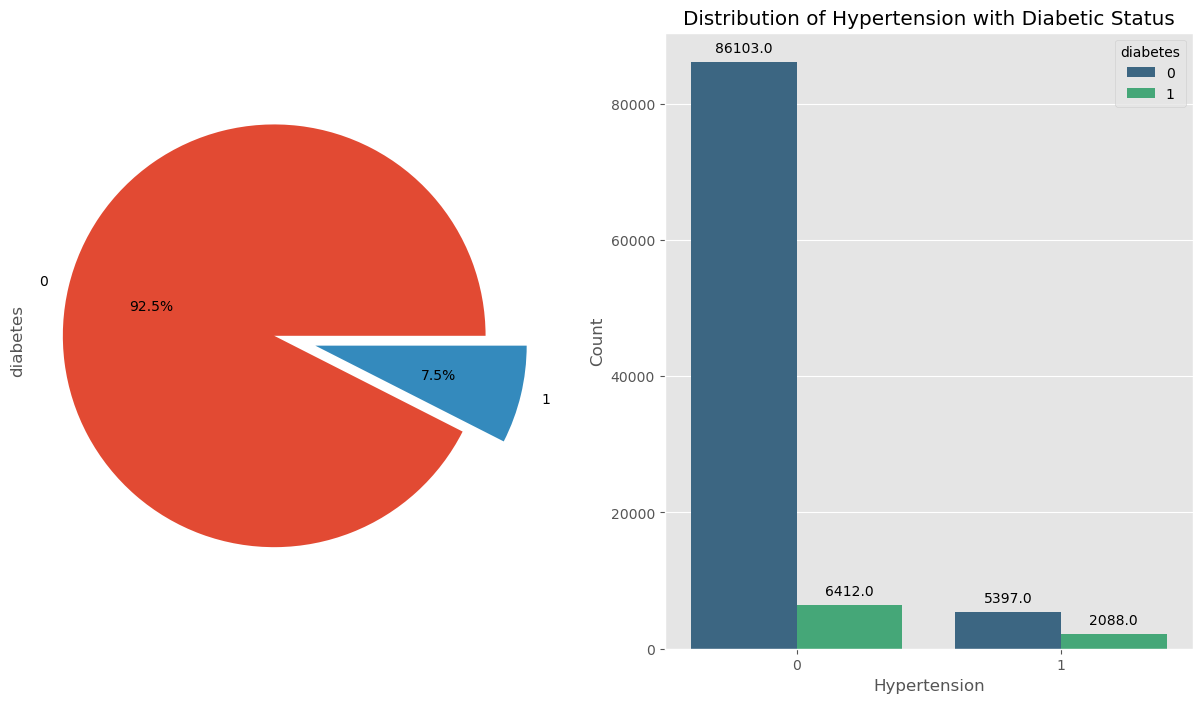

In [11]:
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

#Hypertension Distribution
explode = [0.1, 0.1]
df.groupby('hypertension')['diabetes'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);

ax = sns.countplot(x="hypertension", hue="diabetes", data=df,ax=axb[1], palette="viridis")

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Distribution of Hypertension with Diabetic Status")
plt.xlabel("Hypertension")
plt.ylabel("Count")

# Show the plot
plt.show()

Heart Disease Distribution

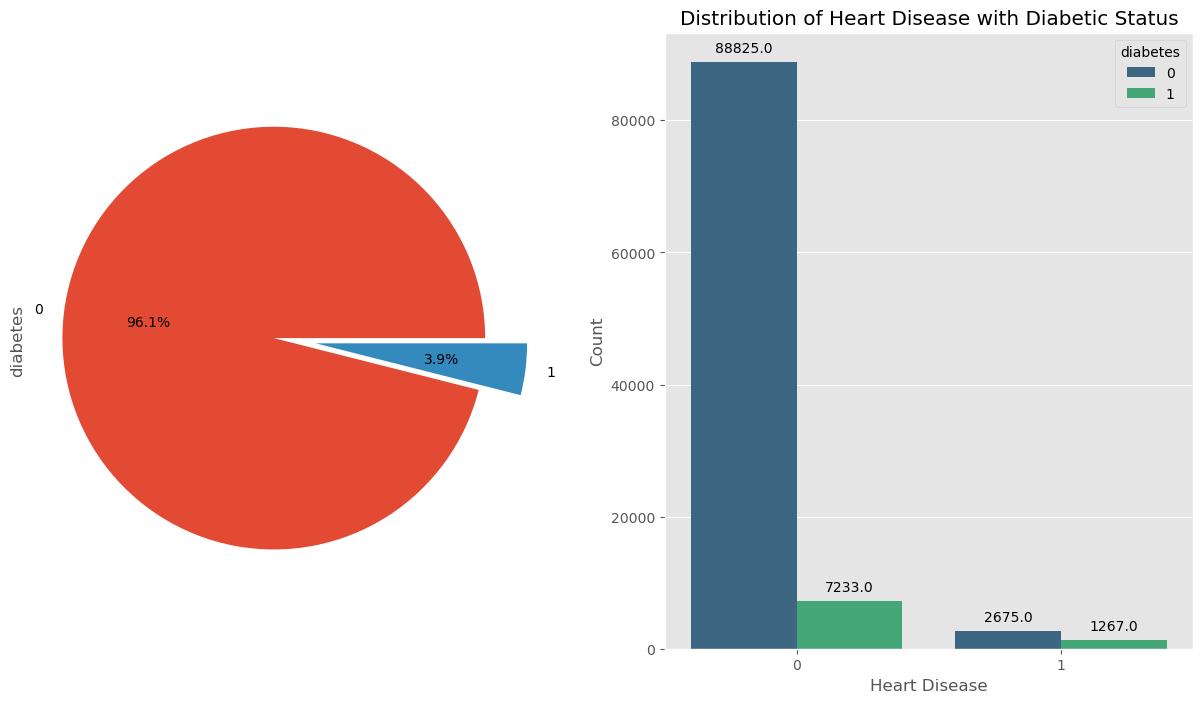

In [12]:
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

#Heart Diseas Distribution
explode = [0.1, 0.1]
df.groupby('heart_disease')['diabetes'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);

ax = sns.countplot(x="heart_disease", hue="diabetes", palette="viridis", data=df,ax=axb[1])

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Distribution of Heart Disease with Diabetic Status")
plt.xlabel("Heart Disease")
plt.ylabel("Count")

# Show the plot
plt.show()

Smoking History Distribution

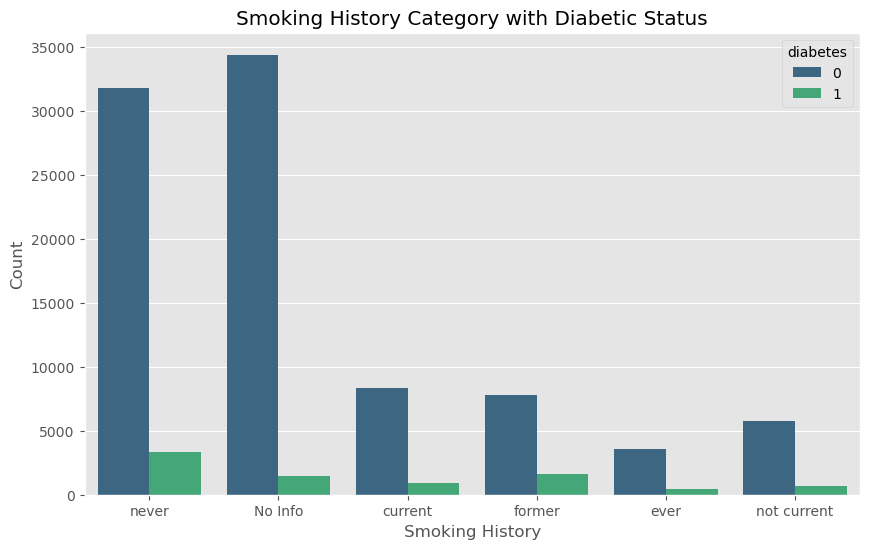

In [13]:
#Smoking History Bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x="smoking_history", data=df, hue="diabetes", palette="viridis")

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Smoking History Category with Diabetic Status")
plt.xlabel("Smoking History")
plt.ylabel("Count")

# Show the plot
plt.show()

BMI Distribution

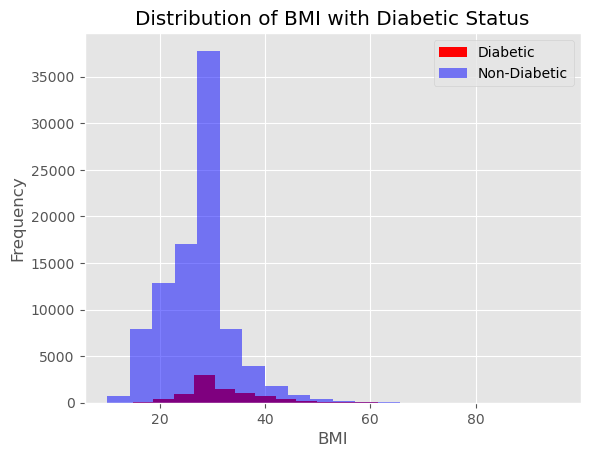

In [14]:
#BMI Distribution
plt.hist(df[df['diabetes'] == 1]['bmi'], bins=20, alpha=1, label='Diabetic', color='red')
plt.hist(df[df['diabetes'] == 0]['bmi'], bins=20, alpha=0.5, label='Non-Diabetic', color='blue')

plt.title('Distribution of BMI with Diabetic Status')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()

Hemoglobin A1c Distribution

Hemoglobin A1c (HbA1c):

Definition: HbA1c is a measure of the average blood glucose levels over the past two to three months.

How it works: When glucose enters the bloodstream, it binds to hemoglobin in red blood cells. The higher the blood glucose levels, the more glucose binds to hemoglobin. HbA1c reflects the percentage of hemoglobin that has glucose attached to it.

Usage: It is a long-term marker of blood sugar control and is commonly used for monitoring and managing diabetes. It provides an average of blood sugar levels over time, offering a more stable indicator than daily or frequent glucose measurements.


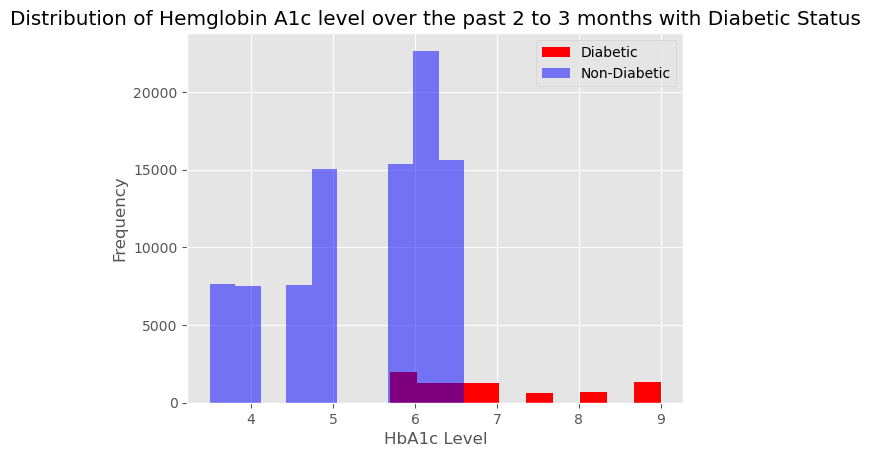

In [15]:
# HbA1c_level Distribution
plt.hist(df[df['diabetes'] == 1]['HbA1c_level'], bins=10, alpha=1, label='Diabetic', color='red')
plt.hist(df[df['diabetes'] == 0]['HbA1c_level'], bins=10, alpha=0.5, label='Non-Diabetic', color='blue')

plt.title('Distribution of Hemglobin A1c level over the past 2 to 3 months with Diabetic Status')
plt.xlabel('HbA1c Level')
plt.ylabel('Frequency')
plt.legend()

Blood Glucose Level Distribution

Blood Glucose Level:

Definition: Blood glucose level represents the concentration of glucose in the blood at a specific point in time.

How it works: Glucose is the primary source of energy for cells, and blood glucose levels can fluctuate throughout the day based on factors like food intake, physical activity, and insulin production.

Usage: Blood glucose levels are often measured through daily monitoring, especially for people with diabetes. It provides immediate information about how the body is handling glucose at a particular moment.

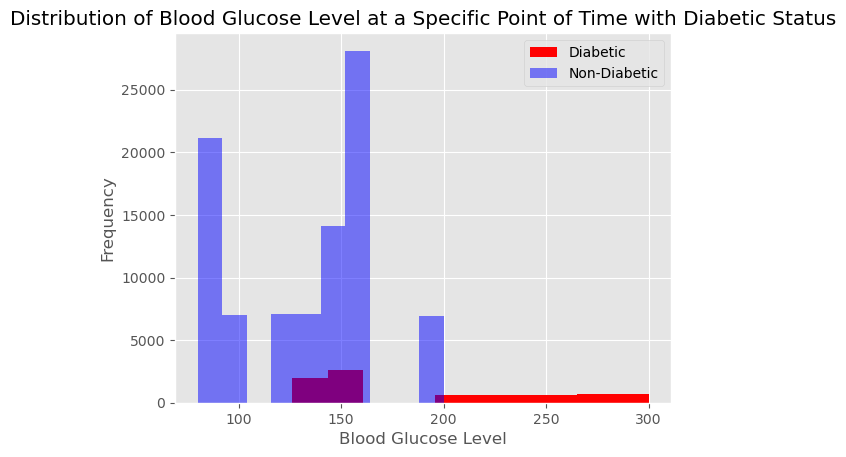

In [16]:
# Blood Glucose Level Distribution
plt.hist(df[df['diabetes'] == 1]['blood_glucose_level'], bins=10, alpha=1, label='Diabetic', color='red')
plt.hist(df[df['diabetes'] == 0]['blood_glucose_level'], bins=10, alpha=0.5, label='Non-Diabetic', color='blue')

plt.title('Distribution of Blood Glucose Level at a Specific Point of Time with Diabetic Status')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Frequency')
plt.legend()

Box Plots

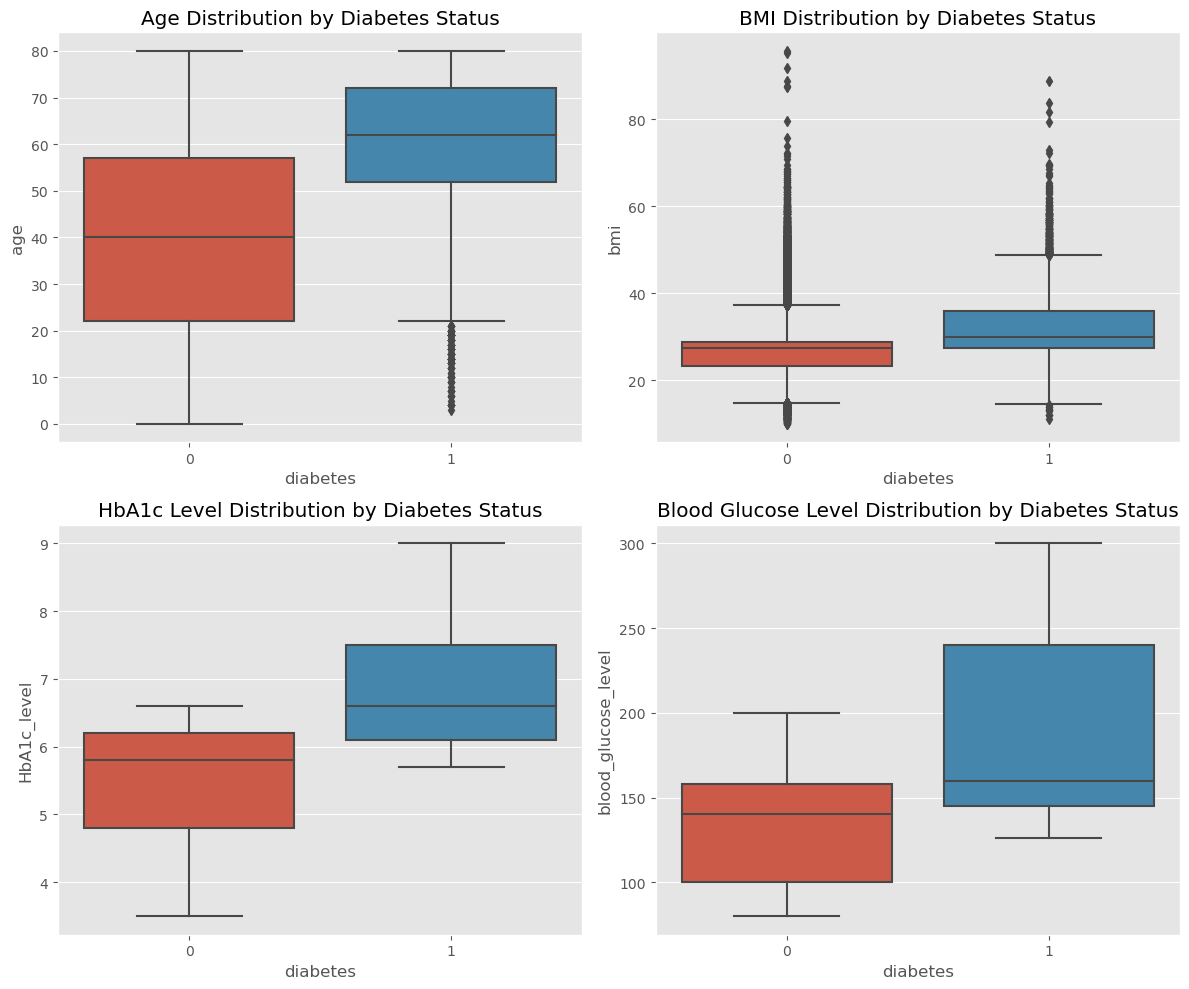

In [17]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Box plot of Age by Diabetes Status
sns.boxplot(x='diabetes', y='age', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution by Diabetes Status')

# Box plot of BMI by Diabetes Status
sns.boxplot(x='diabetes', y='bmi', data=df, ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution by Diabetes Status')

# Box plot of HbA1c Level by Diabetes Status
sns.boxplot(x='diabetes', y='HbA1c_level', data=df, ax=axes[1, 0])
axes[1, 0].set_title('HbA1c Level Distribution by Diabetes Status')

# Box plot of Blood Glucose Level by Diabetes Status
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Blood Glucose Level Distribution by Diabetes Status')

# Adjust layout
plt.tight_layout()
plt.show()


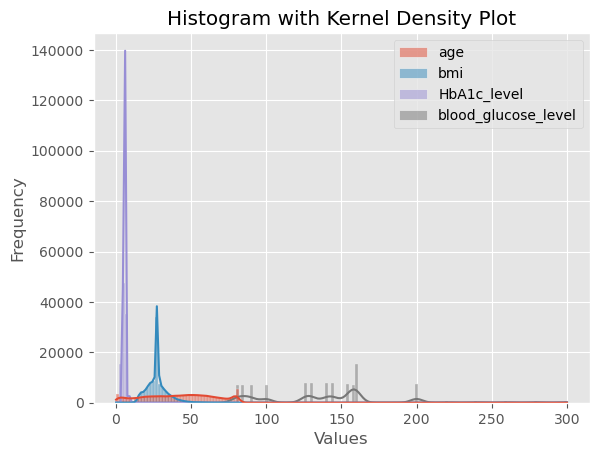

In [18]:
# Skewness using Kernel Density Plot
# Numerical Variables without binary value
features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
sns.histplot(df[features], kde=True)
plt.title('Histogram with Kernel Density Plot')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Correlation Matrix

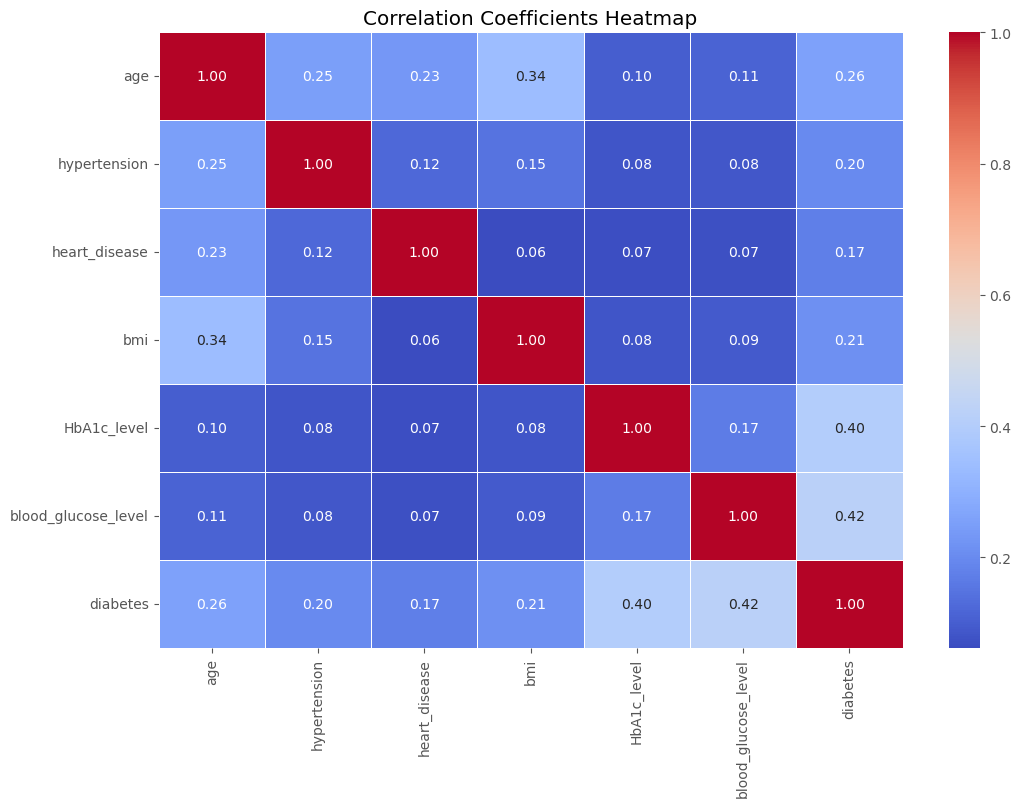

In [19]:
# Select numerical columns (excluding 'gender')
numerical_columns = df.select_dtypes(include=['number']).columns

# Compute the correlation matrix for selected columns
corr_matrix = df[numerical_columns].corr()

# Plot the correlation coefficients heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Coefficients Heatmap')
plt.show()


3. Data Pre-processing

3.1 Handling Missing Data

In [20]:
for column_name in df.columns:
    total_na_rows = df[column_name].isna().sum()
    print(f"Total NaN rows in column {column_name}: {total_na_rows}")

Total NaN rows in column gender: 0
Total NaN rows in column age: 0
Total NaN rows in column hypertension: 0
Total NaN rows in column heart_disease: 0
Total NaN rows in column smoking_history: 0
Total NaN rows in column bmi: 0
Total NaN rows in column HbA1c_level: 0
Total NaN rows in column blood_glucose_level: 0
Total NaN rows in column diabetes: 0


Since there is no missing data, we do not need to handle. 

3.2 Handling Outliers

In [21]:
# Create an empty DataFrame to store outliers
df_outliers_only = pd.DataFrame(columns=df.columns)

# Dictionary to store the percentage of outliers for each column
percent_outliers = {}

# Function to calculate the 3-standard deviation range
def three_sd_range(series):
    mean = series.mean()
    sd = series.std()
    low = mean - 3 * sd
    high = mean + 3 * sd
    
    return (low, high)

# Iterate through numerical columns without binary values
# columns - age, bmi, HbA1c_level, blood_glucose_level
for col_name in ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']:
    lower, upper = three_sd_range(df[col_name])
    outliers_mask = (df[col_name] < lower) | (df[col_name] > upper)

     # Calculate the percentage of outliers
    num_outliers = outliers_mask.sum()
    total_values = len(df[col_name])
    percent_outliers[col_name] = (num_outliers / total_values) * 100
    
    # Print information about outliers in each column
    print(f"{col_name} has outliers: {outliers_mask.any()}")
    
    # Collect outliers into the DataFrame
    df_outliers_only = pd.concat([df_outliers_only, df[outliers_mask]])

# Print percentage of outliers for each column
print("\nPercentage of Outliers for Each Column:")
for col, percentage in percent_outliers.items():
    print(f"{col}: {percentage}%")

# Display the DataFrame with outliers only
print("\nDataFrame with Outliers Only:")
df_outliers_only


age has outliers: False
bmi has outliers: True
HbA1c_level has outliers: True
blood_glucose_level has outliers: True

Percentage of Outliers for Each Column:
age: 0.0%
bmi: 1.294%
HbA1c_level: 1.315%
blood_glucose_level: 1.403%

DataFrame with Outliers Only:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
11,Female,54.0,0,0,former,54.70,6.0,100,0
39,Female,34.0,0,0,never,56.43,6.2,200,0
59,Female,67.0,0,0,never,63.48,8.8,155,1
93,Male,38.0,0,0,never,55.61,6.5,130,0
98,Female,30.0,0,0,No Info,50.13,6.0,100,0
...,...,...,...,...,...,...,...,...,...
99763,Female,50.0,0,0,never,35.91,6.0,280,1
99826,Male,63.0,0,1,No Info,27.32,6.6,300,1
99867,Male,64.0,1,0,former,33.12,5.7,300,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1


Since the variables, 'bmi','HbA1c_level', 'blood_glucose_level' are strong indicators of diabetes, we will not remove the outliers. Removing the outliers might affect our analysis in predicting the diabetes based on these variables.

3.3 Handling Duplicates

In [22]:
df.duplicated().sum()

3854

Even though our dataset has duplicates, we do not remove them since each record of the patient's are unique and there is chance that they might contain the same information and results. The duplicates are useful. 

3.4 Data Formatting

In [23]:
# Variable, Gender includes 'other' 
unique = df['gender'].unique()
print(unique)

# Remove other 
df = df[df['gender'] != 'Other']

['Female' 'Male' 'Other']


In [24]:
# Variable, smoking_history values are similar and we will group the values to 'yes' and 'no'
unique = df['smoking_history'].unique()
print(unique)

new_values = {"never": "no", "No Info": "no", "current": "yes",  "former": "yes", "ever": "yes", "not current": "yes", }
df['smoking_history'] = df['smoking_history'].map(new_values)


['never' 'No Info' 'current' 'former' 'ever' 'not current']


3.5 Data Encoding

In [25]:
# Check the data types
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

Gender Encoding

WOEEncoder

is a type of categorical encoding technique used in machine learning, particularly in the context of handling categorical variables in predictive modeling tasks, such as binary classification. WOE stands for "Weight of Evidence." It is designed for categorical variables, which can include both ordinal and nominal data. It's a popular encoding technique in credit scoring and fraud detection.

In summary, while label encoding simply assigns numerical labels to categories, WOE encoding calculates numerical values based on the relationship between each category and the target variable, providing more meaningful representations for categorical variables in certain modeling contexts, especially those where the predictive power of categorical variables is crucial.

In [26]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [27]:
#Applying WOE encoding for gender

# Initialize the WOEEncoder
woe_encoder = ce.WOEEncoder(cols=['gender'])

# Fit and transform the encoder on the data
encoded_gender_df = woe_encoder.fit_transform(df['gender'], df['diabetes'])

# Concatenate the encoded data with the original DataFrame
df_encoded_gender = pd.concat([df, encoded_gender_df], axis=1)

print(df_encoded_gender.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1              no  25.19   
1  Female  54.0             0              0              no  27.32   
2    Male  28.0             0              0              no  27.32   
3  Female  36.0             0              0             yes  23.45   
4    Male  76.0             1              1             yes  20.14   

   HbA1c_level  blood_glucose_level  diabetes    gender  
0          6.6                  140         0 -0.119227  
1          6.6                   80         0 -0.119227  
2          5.7                  158         0  0.150651  
3          5.0                  155         0 -0.119227  
4          4.8                  155         0  0.150651  


Smoking History Encoding

In [28]:
df['smoking_history'].unique()

array(['no', 'yes'], dtype=object)

In [29]:
#Applying WOE encoding for smoking history

# Initialize the WOEEncoder
woe_encoder = ce.WOEEncoder(cols=['smoking_history'])

# Fit and transform the encoder on the data
encoded_smoking_history_df = woe_encoder.fit_transform(df['smoking_history'], df['diabetes'])

# Concatenate the encoded data with the encoded gender df
df_encoded = pd.concat([df_encoded_gender, encoded_smoking_history_df], axis=1)

print(df_encoded.head())

   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0  Female  80.0             0              1               no  25.19   
1  Female  54.0             0              0               no  27.32   
2    Male  28.0             0              0               no  27.32   
3  Female  36.0             0              0              yes  23.45   
4    Male  76.0             1              1              yes  20.14   

   HbA1c_level  blood_glucose_level  diabetes    gender  smoking_history  
0          6.6                  140         0 -0.119227        -0.246527  
1          6.6                   80         0 -0.119227        -0.246527  
2          5.7                  158         0  0.150651        -0.246527  
3          5.0                  155         0 -0.119227         0.450465  
4          4.8                  155         0  0.150651         0.450465  


3.4 Downsampling 

Downsampling involves reducing the number of instances in the majority class to balance it with the number of instances in the minority class.

This helps prevent the machine learning model from being biased towards the majority class and improves its ability to learn patterns from the minority class.

In [30]:
is_diabetic = df["diabetes"].value_counts()
print("Yes: ",is_diabetic[1])
print("No: ",is_diabetic[0])

Yes:  8500
No:  91482


We have accessed that the dataset is unbalanced. The diabetic count, the variable to predict is not represented equally.

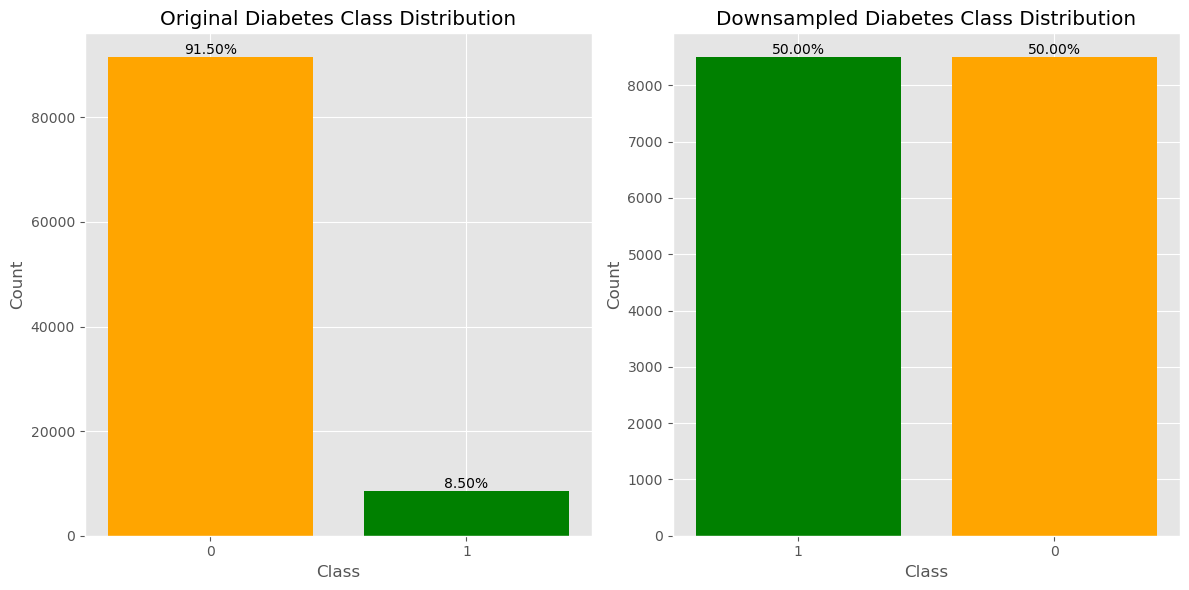

In [31]:
No_class = df_encoded[df_encoded["diabetes"]==0]
Yes_class = df_encoded[df_encoded["diabetes"]==1]

No_class = resample(No_class, replace=False, n_samples=len(Yes_class))
down_samples = pd.concat([Yes_class, No_class], axis=0)

# Count the occurrences of each class in the original dataset
original_class_counts = df_encoded["diabetes"].value_counts()

# Count the occurrences of each class in the downsampled dataset
downsampled_class_counts = down_samples["diabetes"].value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(df_encoded) * 100
downsampled_percentages = downsampled_class_counts / len(down_samples) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Diabetes Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['0', '1'])

# Bar chart for downsampled class distribution
plt.subplot(1, 2, 2)
bars_2 = plt.bar(downsampled_class_counts.index, downsampled_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_2, downsampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Downsampled Diabetes Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(downsampled_class_counts.index, ['0', '1'])

plt.tight_layout() # the plots will be automatically adjusted to ensure that there is no overlap between subplots and that all elements are clearly visible.
plt.show()

In [32]:
down_samples

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender,smoking_history
6,Female,44.0,0,0,no,19.31,6.5,200,1,-0.119227,-0.246527
26,Male,67.0,0,1,yes,27.32,6.5,200,1,0.150651,0.450465
38,Male,50.0,1,0,yes,27.32,5.7,260,1,0.150651,0.450465
40,Male,73.0,0,0,yes,25.91,9.0,160,1,0.150651,0.450465
53,Female,53.0,0,0,yes,27.32,7.0,159,1,-0.119227,0.450465
...,...,...,...,...,...,...,...,...,...,...,...
78808,Male,55.0,0,0,no,27.32,4.0,160,0,0.150651,-0.246527
32192,Female,31.0,0,0,no,25.86,6.1,80,0,-0.119227,-0.246527
63929,Male,80.0,0,0,yes,26.93,6.0,126,0,0.150651,0.450465
81427,Male,75.0,0,0,no,23.10,6.5,80,0,0.150651,-0.246527


<h1>EDA using the down_samples</h1>

C:\Users\Calista\AppData\Local\Temp\ipykernel_11756\586271331.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = down_samples[numerical_columns].corr()


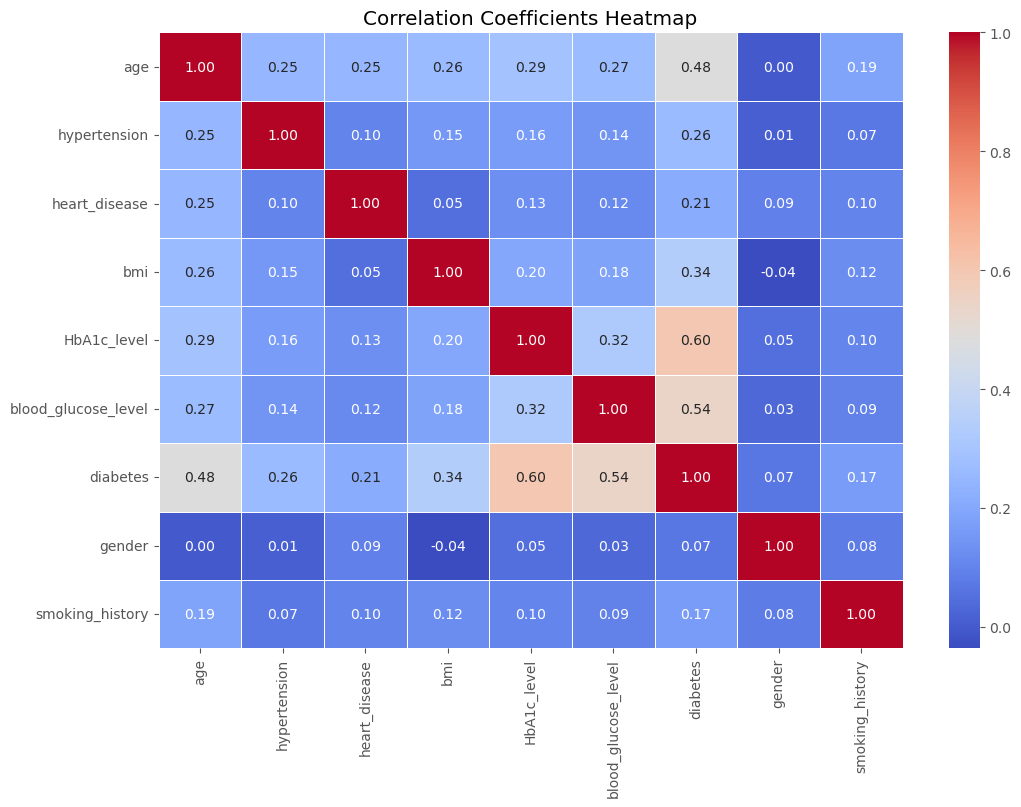

In [33]:
# Select numerical columns (excluding 'gender')
numerical_columns = down_samples.select_dtypes(include=['number']).columns

# Compute the correlation matrix for selected columns
corr_matrix = down_samples[numerical_columns].corr()

# Plot the correlation coefficients heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Coefficients Heatmap')
plt.show()

In [34]:
down_samples.skew()

C:\Users\Calista\AppData\Local\Temp\ipykernel_11756\3350474065.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  down_samples.skew()


age                   -0.547445
hypertension           1.946426
heart_disease          2.899859
bmi                    1.149796
HbA1c_level            0.222891
blood_glucose_level    0.830406
diabetes               0.000000
gender                 0.229996
smoking_history        0.601002
dtype: float64

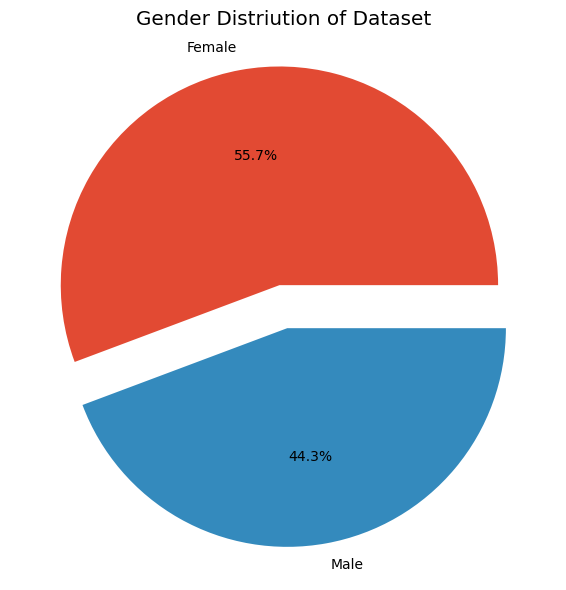

In [35]:
df_new = down_samples.select_dtypes(include=[np.number])

gender_dist = df_new["gender"].value_counts()
plt.figure(figsize=(10, 6))
#plt.subplot(1, 2, 1)  # Subplot for the pie chart
explode = [0.1, 0.1]
plt.pie(gender_dist, labels=["Female", "Male"],explode=explode, autopct="%1.1f%%")
plt.title("Gender Distriution of Dataset")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

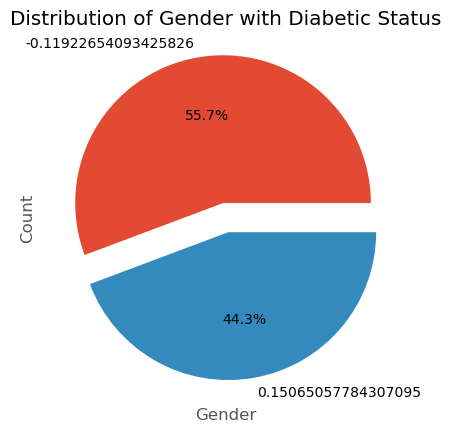

In [36]:
#fig = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

#Gender Distribution
explode = [0.1, 0.1]
df_new.groupby('gender')['diabetes'].count().plot.pie(explode=explode, autopct="%1.1f%%");

# Set labels and title
plt.title("Distribution of Gender with Diabetic Status")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

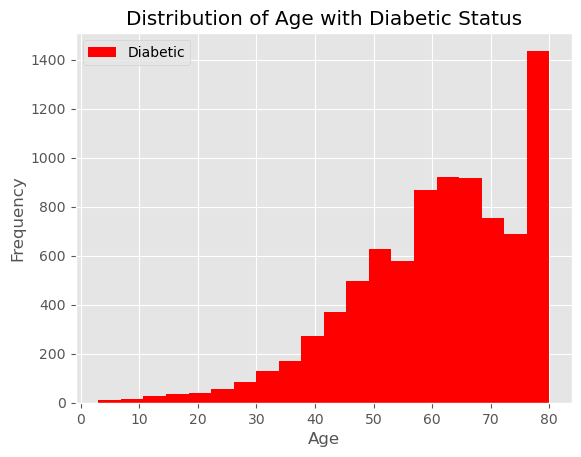

In [37]:
#Age Distribution
plt.hist(df_new[df_new['diabetes'] == 1]['age'], bins=20, alpha=1, label='Diabetic', color='red')
#plt.hist(df_new[df_new['diabetes'] == 0]['age'], bins=20, alpha=0.5, label='Non-Diabetic', color='blue')

plt.title('Distribution of Age with Diabetic Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

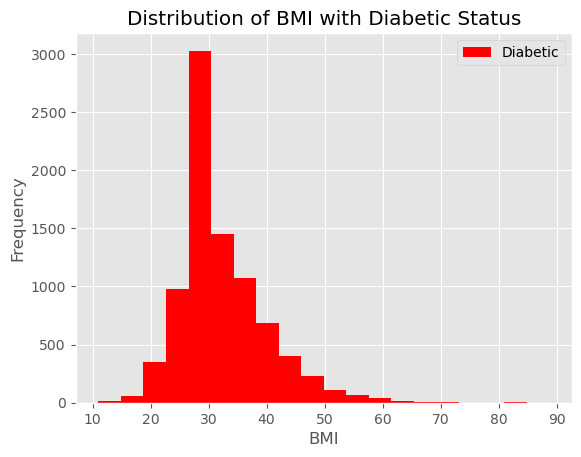

In [38]:
#BMI Distribution
plt.hist(df_new[df_new['diabetes'] == 1]['bmi'], bins=20, alpha=1, label='Diabetic', color='red')
#plt.hist(df_new[df_new['diabetes'] == 0]['bmi'], bins=20, alpha=0.5, label='Non-Diabetic', color='blue')

plt.title('Distribution of BMI with Diabetic Status')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()

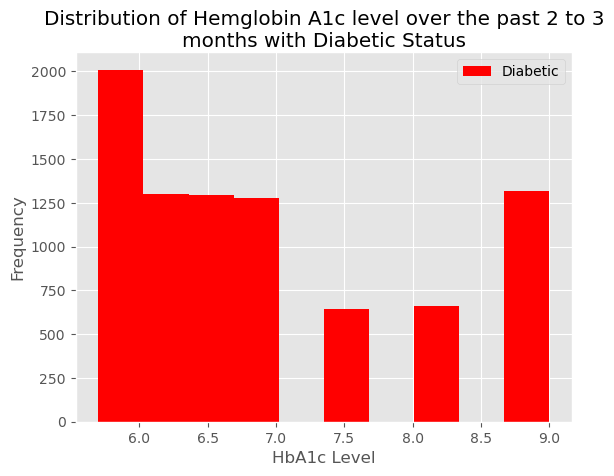

In [39]:
# HbA1c_level Distribution
plt.hist(df_new[df_new['diabetes'] == 1]['HbA1c_level'], bins=10, alpha=1, label='Diabetic', color='red')
#plt.hist(df_new[df_new['diabetes'] == 0]['HbA1c_level'], bins=10, alpha=0.5, label='Non-Diabetic', color='blue')

plt.title('Distribution of Hemglobin A1c level over the past 2 to 3 months with Diabetic Status', wrap=True)
plt.xlabel('HbA1c Level')
plt.ylabel('Frequency')
plt.legend()

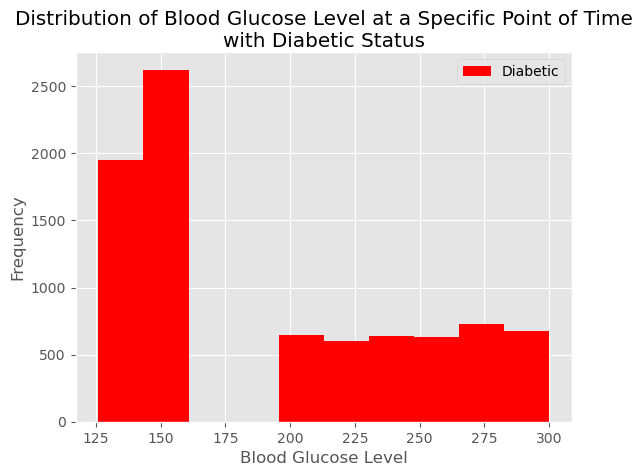

In [40]:
# Blood Glucose Level Distribution
plt.hist(df_new[df_new['diabetes'] == 1]['blood_glucose_level'], bins=10, alpha=1, label='Diabetic', color='red')
#plt.hist(df_new[df_new['diabetes'] == 0]['blood_glucose_level'], bins=10, alpha=0.5, label='Non-Diabetic', color='blue')

plt.title('Distribution of Blood Glucose Level at a Specific Point of Time with Diabetic Status', wrap=True)
plt.xlabel('Blood Glucose Level')
plt.ylabel('Frequency')
plt.legend()

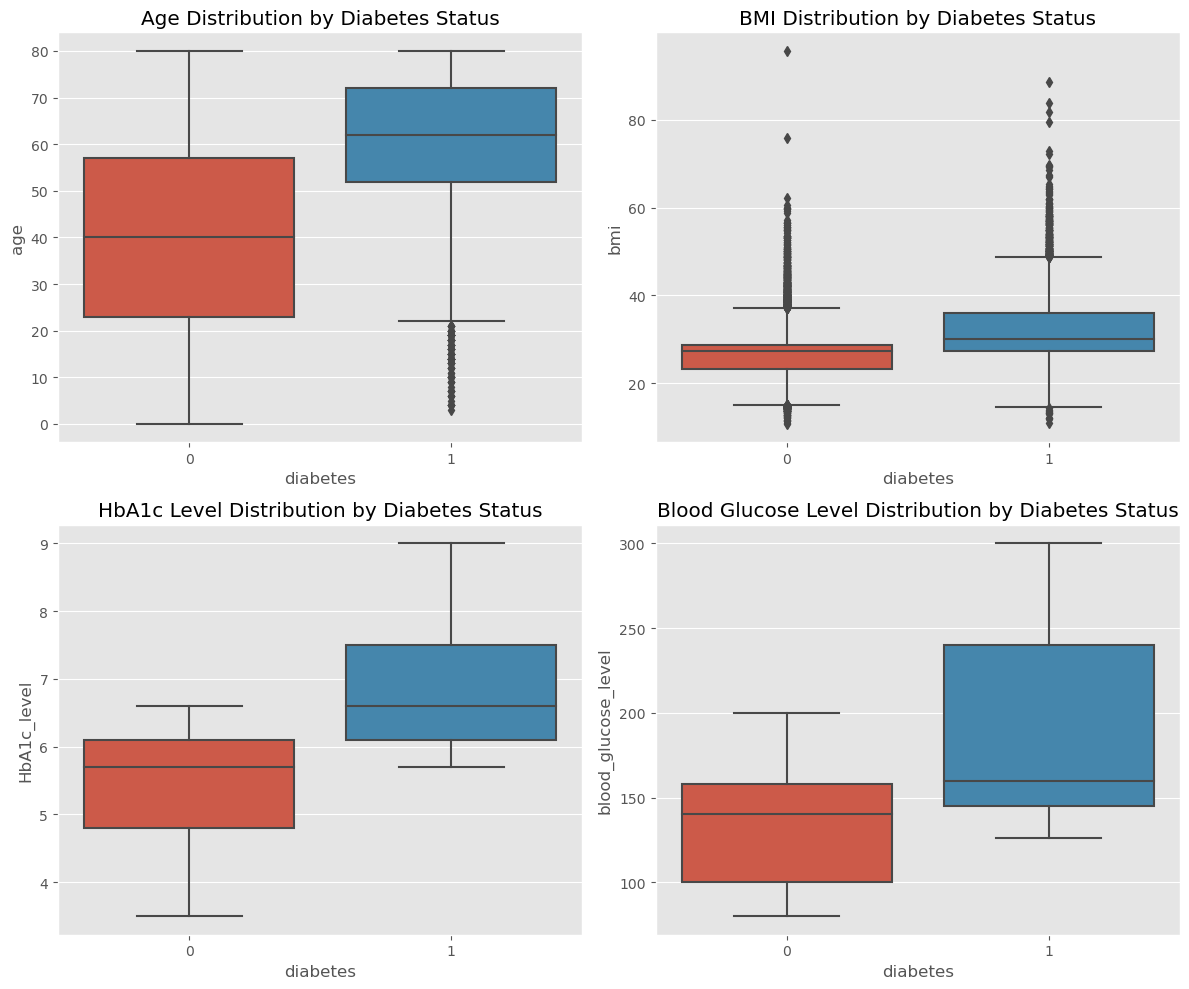

In [41]:
### Boxplot
# Set up the figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Box plot of Age by Diabetes Status
sns.boxplot(x='diabetes', y='age', data=df_new, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution by Diabetes Status')

# Box plot of BMI by Diabetes Status
sns.boxplot(x='diabetes', y='bmi', data=df_new, ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution by Diabetes Status')

# Box plot of HbA1c Level by Diabetes Status
sns.boxplot(x='diabetes', y='HbA1c_level', data=df_new, ax=axes[1, 0])
axes[1, 0].set_title('HbA1c Level Distribution by Diabetes Status')

# Box plot of Blood Glucose Level by Diabetes Status
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df_new, ax=axes[1, 1])
axes[1, 1].set_title('Blood Glucose Level Distribution by Diabetes Status')

# Adjust layout
plt.tight_layout()
plt.show()

<h1>Final EDA used in Proposal</h1>

In [4]:
df_original = pd.read_csv('diabetes_prediction_dataset.csv')

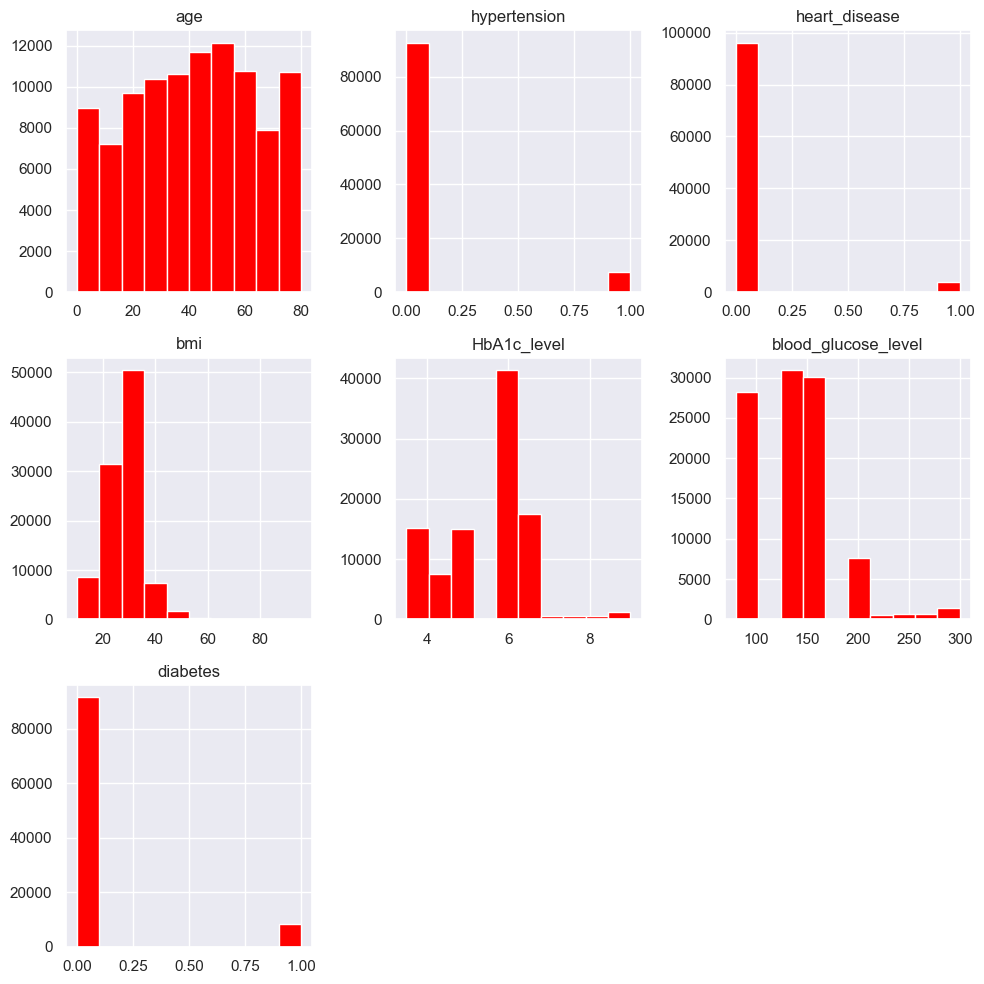

In [66]:
# histogram
df_original.hist(figsize = (10,10), color = 'red')
plt.tight_layout()

In [3]:
df_original.skew()

NameError: name 'df_original' is not defined

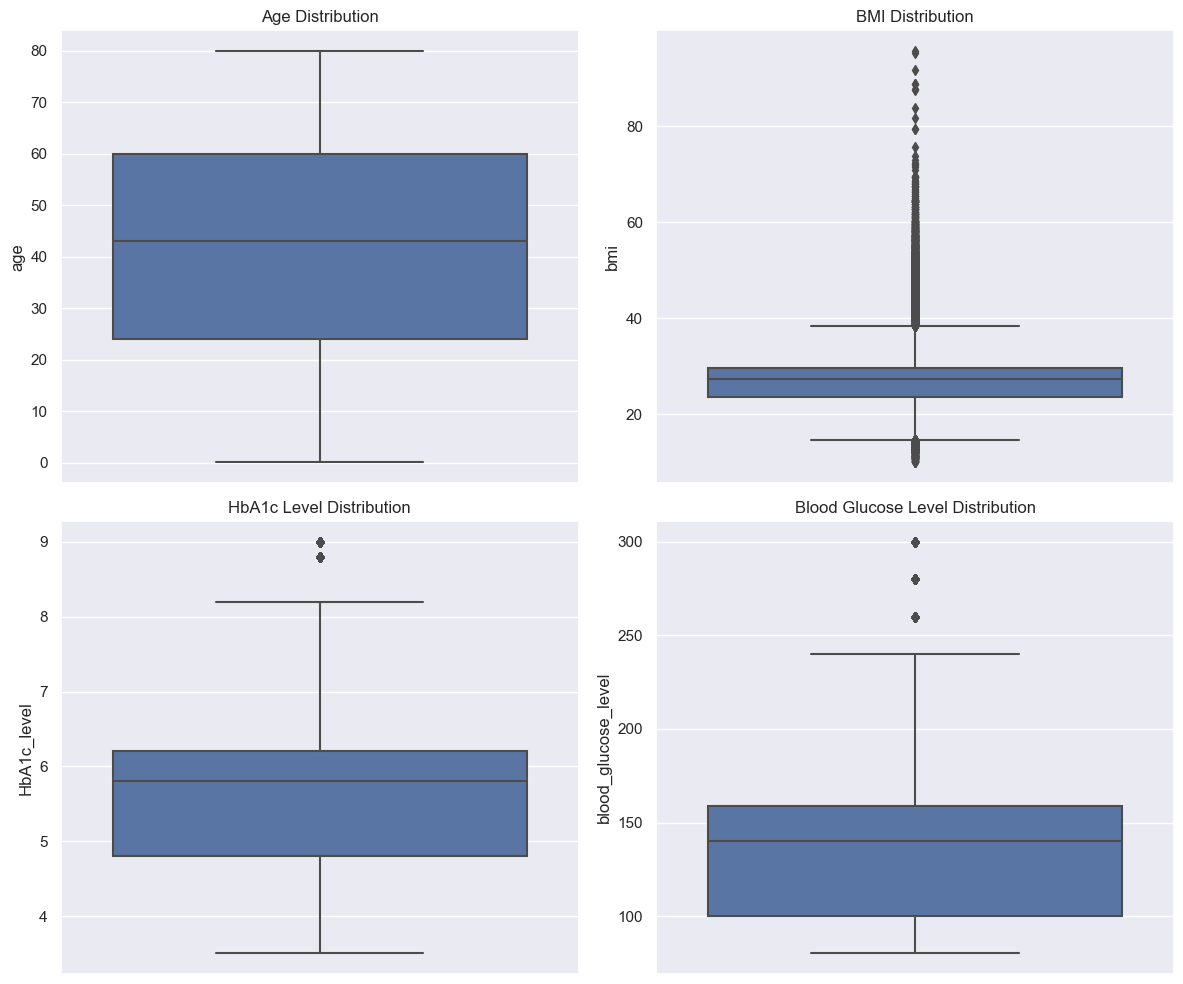

In [98]:
### Boxplot
# Set up the figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Box plot of Age 
ax1 = sns.boxplot(y='age', data=df_original, ax=axes[0, 0])
ax1.set_title('Age Distribution')

# Box plot of BMI 
ax2 = sns.boxplot(y='bmi', data=df_original, ax=axes[0, 1])
ax2.set_title('BMI Distribution')

# Box plot of HbA1c Level
ax3 = sns.boxplot(y='HbA1c_level', data=df_original, ax=axes[1, 0])
ax3.set_title('HbA1c Level Distribution')

# Box plot of Blood Glucose Level
ax4 = sns.boxplot(y='blood_glucose_level', data=df_original, ax=axes[1, 1])
ax4.set_title('Blood Glucose Level Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

In [97]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


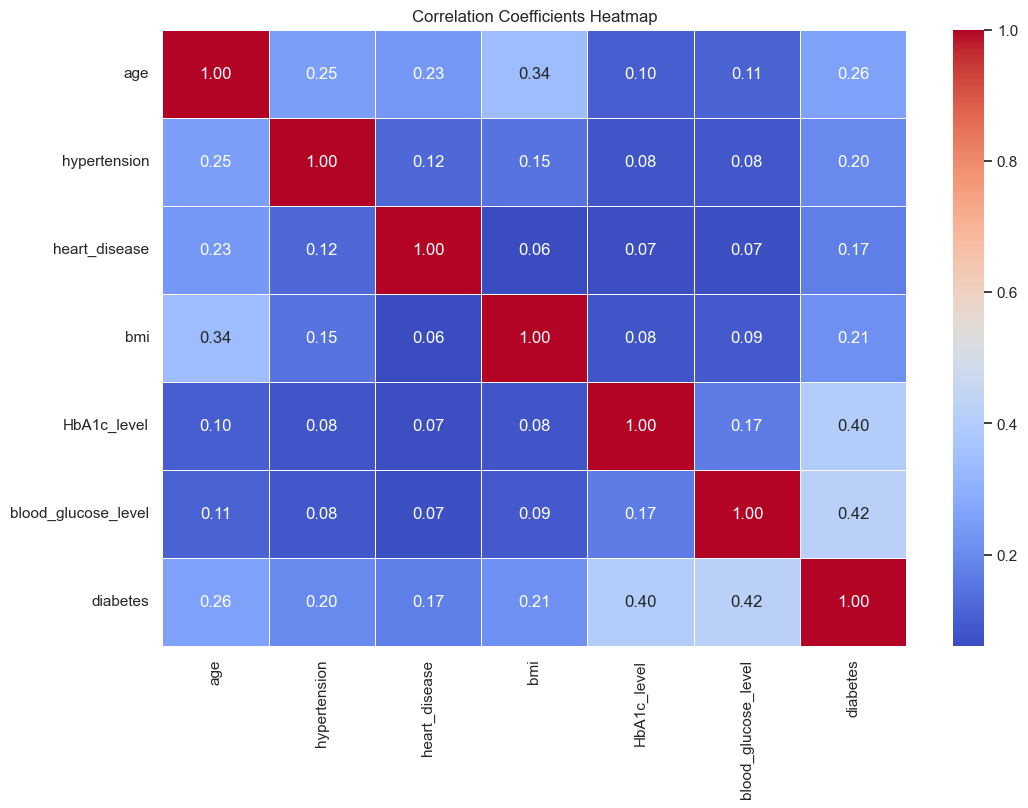

In [69]:
# Select numerical columns (excluding 'gender')
numerical_columns = df_original.select_dtypes(include=['number']).columns

# Compute the correlation matrix for selected columns
corr_matrix = df_original[numerical_columns].corr()

# Plot the correlation coefficients heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Coefficients Heatmap')
plt.show()

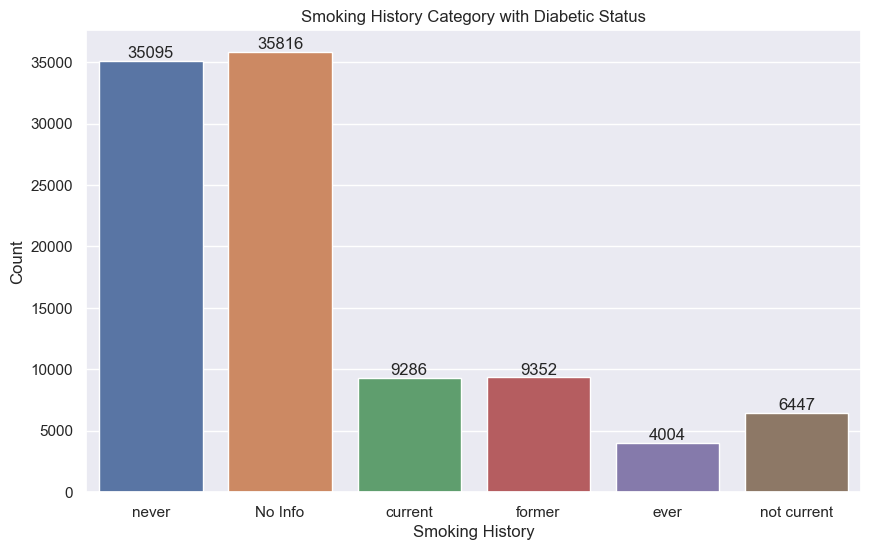

In [100]:
#Smoking History Bar chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="smoking_history", data=df_original)

# Add values on top of each bar
#for p in ax.patches:
#    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Smoking History Category with Diabetic Status")
plt.xlabel("Smoking History")
plt.ylabel("Count")
for i in ax.containers:
    ax.bar_label(i,)

# Show the plot
plt.show()

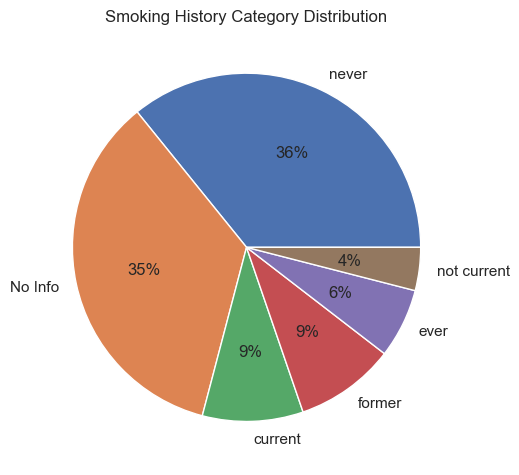

In [103]:
smoking_status = df_original["smoking_history"].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(smoking_status, labels=["never", "No Info", 'current', 'former', 'ever', 'not current'], autopct="%0.0f%%")
plt.title("Smoking History Category Distribution")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [6]:
df_original.isnull().any()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool